In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torchvision.models as models

from sklearn.model_selection import train_test_split

import itertools
import copy

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
transformers = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], # mean imagenet
                         [0.229, 0.224, 0.225]) # std imagenet
])

there may be a whitespace after "Colorectal Cancer", please remove it.

check that your dataset has only 6000 images.

In [ ]:
dataset_colorectal_cancer = datasets.ImageFolder(root = ("/content/drive/MyDrive/PhD/Courses/ML/Project/Codes/Dataset/Dataset_1/Colorectal_Cancer"),
transform = transformers)

In [ ]:
print(dataset_colorectal_cancer)

Dataset ImageFolder
    Number of datapoints: 6000
    Root location: /content/drive/MyDrive/PhD/Courses/ML/Project/Codes/Dataset/Dataset_1/Colorectal_Cancer
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=warn)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


In [ ]:
#dataset_prostate_cancer = datasets.ImageFolder(root = ("Datasets/Dataset_2/Prostate_Cancer"),
#transform = transformers)

In [ ]:
#dataset_animal_faces = datasets.ImageFolder(root = ("Datasets/Dataset_3/Animal_Faces"),
#transform = transformers)

In [ ]:
train_ind, test_ind = train_test_split(list(range(len(dataset_colorectal_cancer.targets))),
                                       test_size=0.3, random_state = 0,stratify=dataset_colorectal_cancer.targets)

train_ind_validation, validation_ind = train_test_split(train_ind, test_size=0.2, random_state = 0)

In [ ]:
train_set = torch.utils.data.Subset(dataset_colorectal_cancer, train_ind_validation)
validation_set = torch.utils.data.Subset(dataset_colorectal_cancer, validation_ind)
test_set = torch.utils.data.Subset(dataset_colorectal_cancer, test_ind)

In [ ]:
print(len(train_set))
print(len(validation_set))
print(len(test_set))

3360
840
1800


In [ ]:
lr = [0.1, 0.01, 0.001]
bs = [16, 32, 64]
opti = ["SGD", "Adam", "RMSprop"]

In [ ]:
combinations = list(itertools.product(*[lr, bs, opti]))

In [ ]:
combinations

[(0.1, 16, 'SGD'),
 (0.1, 16, 'Adam'),
 (0.1, 16, 'RMSprop'),
 (0.1, 32, 'SGD'),
 (0.1, 32, 'Adam'),
 (0.1, 32, 'RMSprop'),
 (0.1, 64, 'SGD'),
 (0.1, 64, 'Adam'),
 (0.1, 64, 'RMSprop'),
 (0.01, 16, 'SGD'),
 (0.01, 16, 'Adam'),
 (0.01, 16, 'RMSprop'),
 (0.01, 32, 'SGD'),
 (0.01, 32, 'Adam'),
 (0.01, 32, 'RMSprop'),
 (0.01, 64, 'SGD'),
 (0.01, 64, 'Adam'),
 (0.01, 64, 'RMSprop'),
 (0.001, 16, 'SGD'),
 (0.001, 16, 'Adam'),
 (0.001, 16, 'RMSprop'),
 (0.001, 32, 'SGD'),
 (0.001, 32, 'Adam'),
 (0.001, 32, 'RMSprop'),
 (0.001, 64, 'SGD'),
 (0.001, 64, 'Adam'),
 (0.001, 64, 'RMSprop')]

In [ ]:
model_resnet18 = models.resnet18()
# Modify the fully connected (fc) layer for 3-class classification
num_features = model_resnet18.fc.in_features
model_resnet18.fc = torch.nn.Linear(num_features, 3)
# Print the modified model to verify the changes
print(model_resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
models_array = []
num_epoch = 5
device = 'cuda:0' # use 'cuda:0' to speed it up.
train_loss_data = []
val_loss_data = []

In [ ]:
for lr, batch_size, opt in combinations:
    print(f"Training model with combination: (lr={lr}, batch_size={batch_size}, optimizer={opt})")

    model_resnet18_training = copy.deepcopy(model_resnet18)
    model_resnet18_training.to(device)
    if opt == "SGD":
        optimizer = torch.optim.SGD(model_resnet18_training.parameters(), lr=lr)
    elif opt == "RMSprop":
        optimizer = torch.optim.RMSprop(model_resnet18_training.parameters(), lr=lr)
    elif opt == "Adam":
        optimizer = torch.optim.Adam(model_resnet18_training.parameters(), lr=lr)

    train_loader = DataLoader(train_set, shuffle=True, batch_size = batch_size, pin_memory = True) # create train loader
    validation_loader = DataLoader(validation_set, batch_size = batch_size, pin_memory = True) # create test loader

    # Define loss function and training criterion
    criterion = torch.nn.CrossEntropyLoss()

    # Training
    for epoch in range(num_epoch):
        model_resnet18_training.train()
        train_loss = 0.0
        correct_train = 0.0
        total_train = 0.0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            out_preds = model_resnet18_training(inputs)
            l = criterion(out_preds, labels)

            model_resnet18_training.zero_grad()
            l.backward()
            optimizer.step()

            train_loss += l.item()
            _, predicted_train = torch.max(out_preds.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted_train == labels).sum().item()
        train_loss /= len(train_loader)
        train_accuracy = 100 * correct_train / total_train
        train_loss_data.append([epoch+1,(lr, batch_size, opt), train_loss, train_accuracy])
        # Validation
        model_resnet18_training.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for inputs, labels in validation_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model_resnet18_training(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted_val = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted_val == labels).sum().item()

        # Calculate validation metrics
        val_loss /= len(validation_set)
        val_accuracy = 100 * correct_val / total_val
        val_loss_data.append([epoch+1, (lr, batch_size, opt), val_loss, val_accuracy])
        # Print training and validation metrics for this epoch
        print(f"Epoch [{epoch+1}], Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

Training model with combination: (lr=0.1, batch_size=16, optimizer=SGD)
Epoch [1], Training Loss: 1.1199, Training Accuracy: 63.30%, Validation Loss: 0.0990, Validation Accuracy: 60.12%
Epoch [2], Training Loss: 0.5119, Training Accuracy: 79.58%, Validation Loss: 0.1070, Validation Accuracy: 72.86%
Epoch [3], Training Loss: 0.4181, Training Accuracy: 84.08%, Validation Loss: 0.0187, Validation Accuracy: 87.26%
Epoch [4], Training Loss: 0.3663, Training Accuracy: 85.54%, Validation Loss: 0.0132, Validation Accuracy: 94.05%
Epoch [5], Training Loss: 0.3313, Training Accuracy: 86.73%, Validation Loss: 0.0228, Validation Accuracy: 88.45%
Training model with combination: (lr=0.1, batch_size=16, optimizer=Adam)
Epoch [1], Training Loss: 1.5983, Training Accuracy: 51.07%, Validation Loss: 0.0470, Validation Accuracy: 64.64%
Epoch [2], Training Loss: 0.7287, Training Accuracy: 63.66%, Validation Loss: 0.0382, Validation Accuracy: 63.10%
Epoch [3], Training Loss: 0.6148, Training Accuracy: 71.7

---------

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_train = pd.DataFrame(train_loss_data, columns = ["epoch", "hyperparameters", "train_loss", "train_accuracy"])
df_train

,epoch,hyperparameters,train_loss,train_accuracy
0,1,"(0.1, 16, SGD)",1.119899,63.303571
1,2,"(0.1, 16, SGD)",0.511911,79.583333
2,3,"(0.1, 16, SGD)",0.418116,84.077381
3,4,"(0.1, 16, SGD)",0.366288,85.535714
4,5,"(0.1, 16, SGD)",0.331299,86.726190
...,...,...,...,...
130,1,"(0.001, 64, RMSprop)",0.857669,66.964286
131,2,"(0.001, 64, RMSprop)",0.413520,83.750000
132,3,"(0.001, 64, RMSprop)",0.334567,86.517857
133,4,"(0.001, 64, RMSprop)",0.307713,87.708333


In [ ]:
df_train.loc[df_train["train_accuracy"].idxmax()]

epoch                            5
hyperparameters    (0.01, 32, SGD)
train_loss                0.206618
train_accuracy                92.5
Name: 64, dtype: object

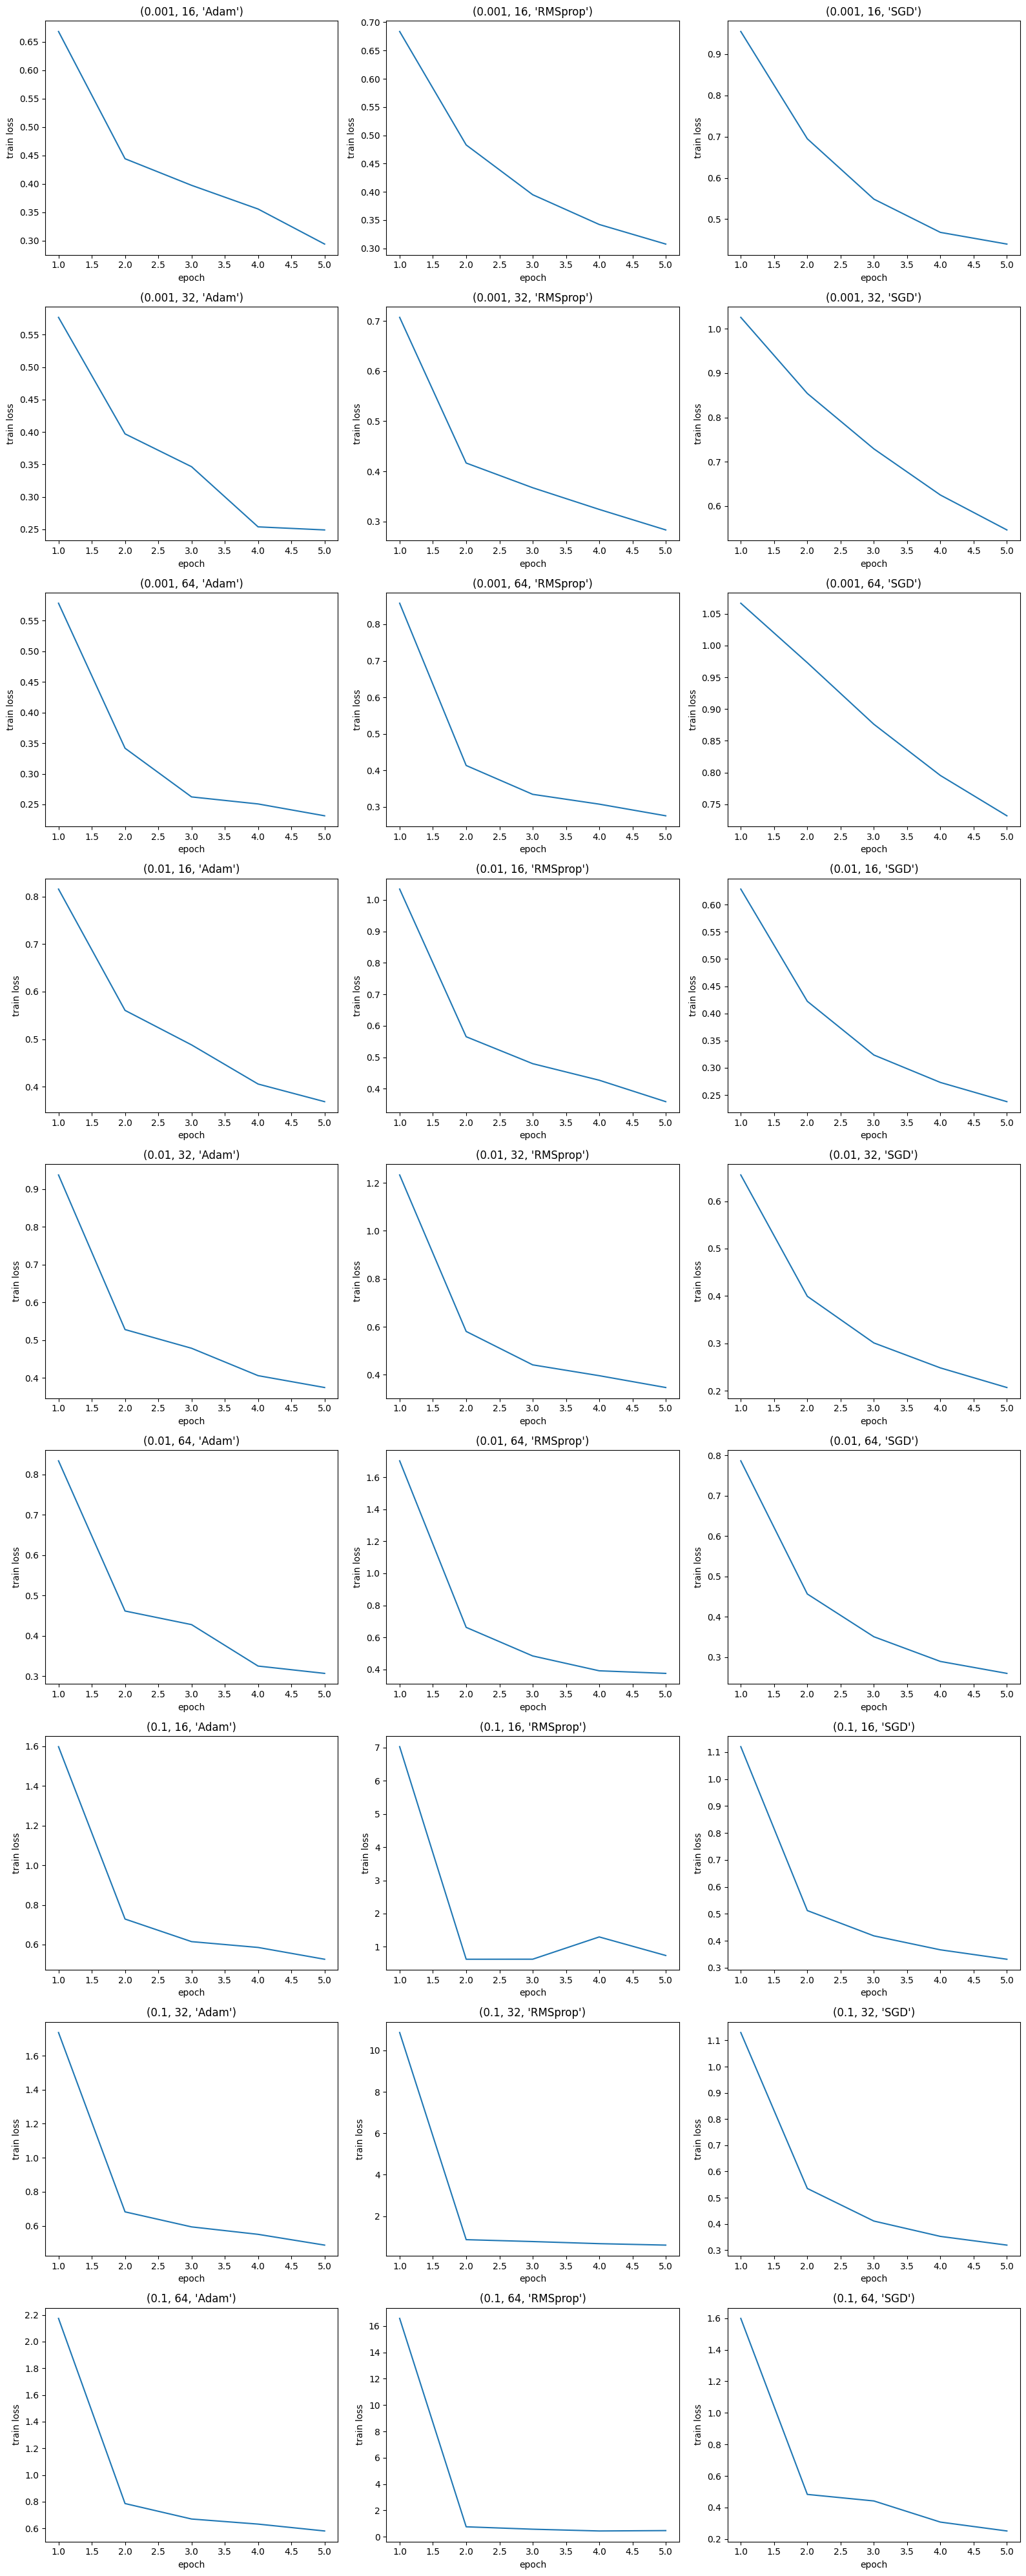

In [ ]:
plt.figure(figsize = (16,40))
cont = 1
for exp in df_train.groupby("hyperparameters"):
  plt.subplot(9,3,cont)
  plt.plot(exp[1]["epoch"],exp[1]["train_loss"])
  plt.title(exp[0])
  plt.xlabel("epoch")
  plt.ylabel("train loss")
  cont = cont + 1
plt.tight_layout()

In [ ]:
df_val = pd.DataFrame(val_loss_data, columns = ["epoch", "hyperparameters", "val_loss", "val_accuracy"])
df_val

,epoch,hyperparameters,val_loss,val_accuracy
0,1,"(0.1, 16, SGD)",0.099011,60.119048
1,2,"(0.1, 16, SGD)",0.107047,72.857143
2,3,"(0.1, 16, SGD)",0.018664,87.261905
3,4,"(0.1, 16, SGD)",0.013246,94.047619
4,5,"(0.1, 16, SGD)",0.022813,88.452381
...,...,...,...,...
130,1,"(0.001, 64, RMSprop)",0.020769,51.071429
131,2,"(0.001, 64, RMSprop)",0.024662,45.952381
132,3,"(0.001, 64, RMSprop)",0.012180,75.595238
133,4,"(0.001, 64, RMSprop)",0.009191,80.714286


In [ ]:
df_val.loc[df_val["val_accuracy"].idxmax()]

epoch                           4
hyperparameters    (0.1, 16, SGD)
val_loss                 0.013246
val_accuracy            94.047619
Name: 3, dtype: object

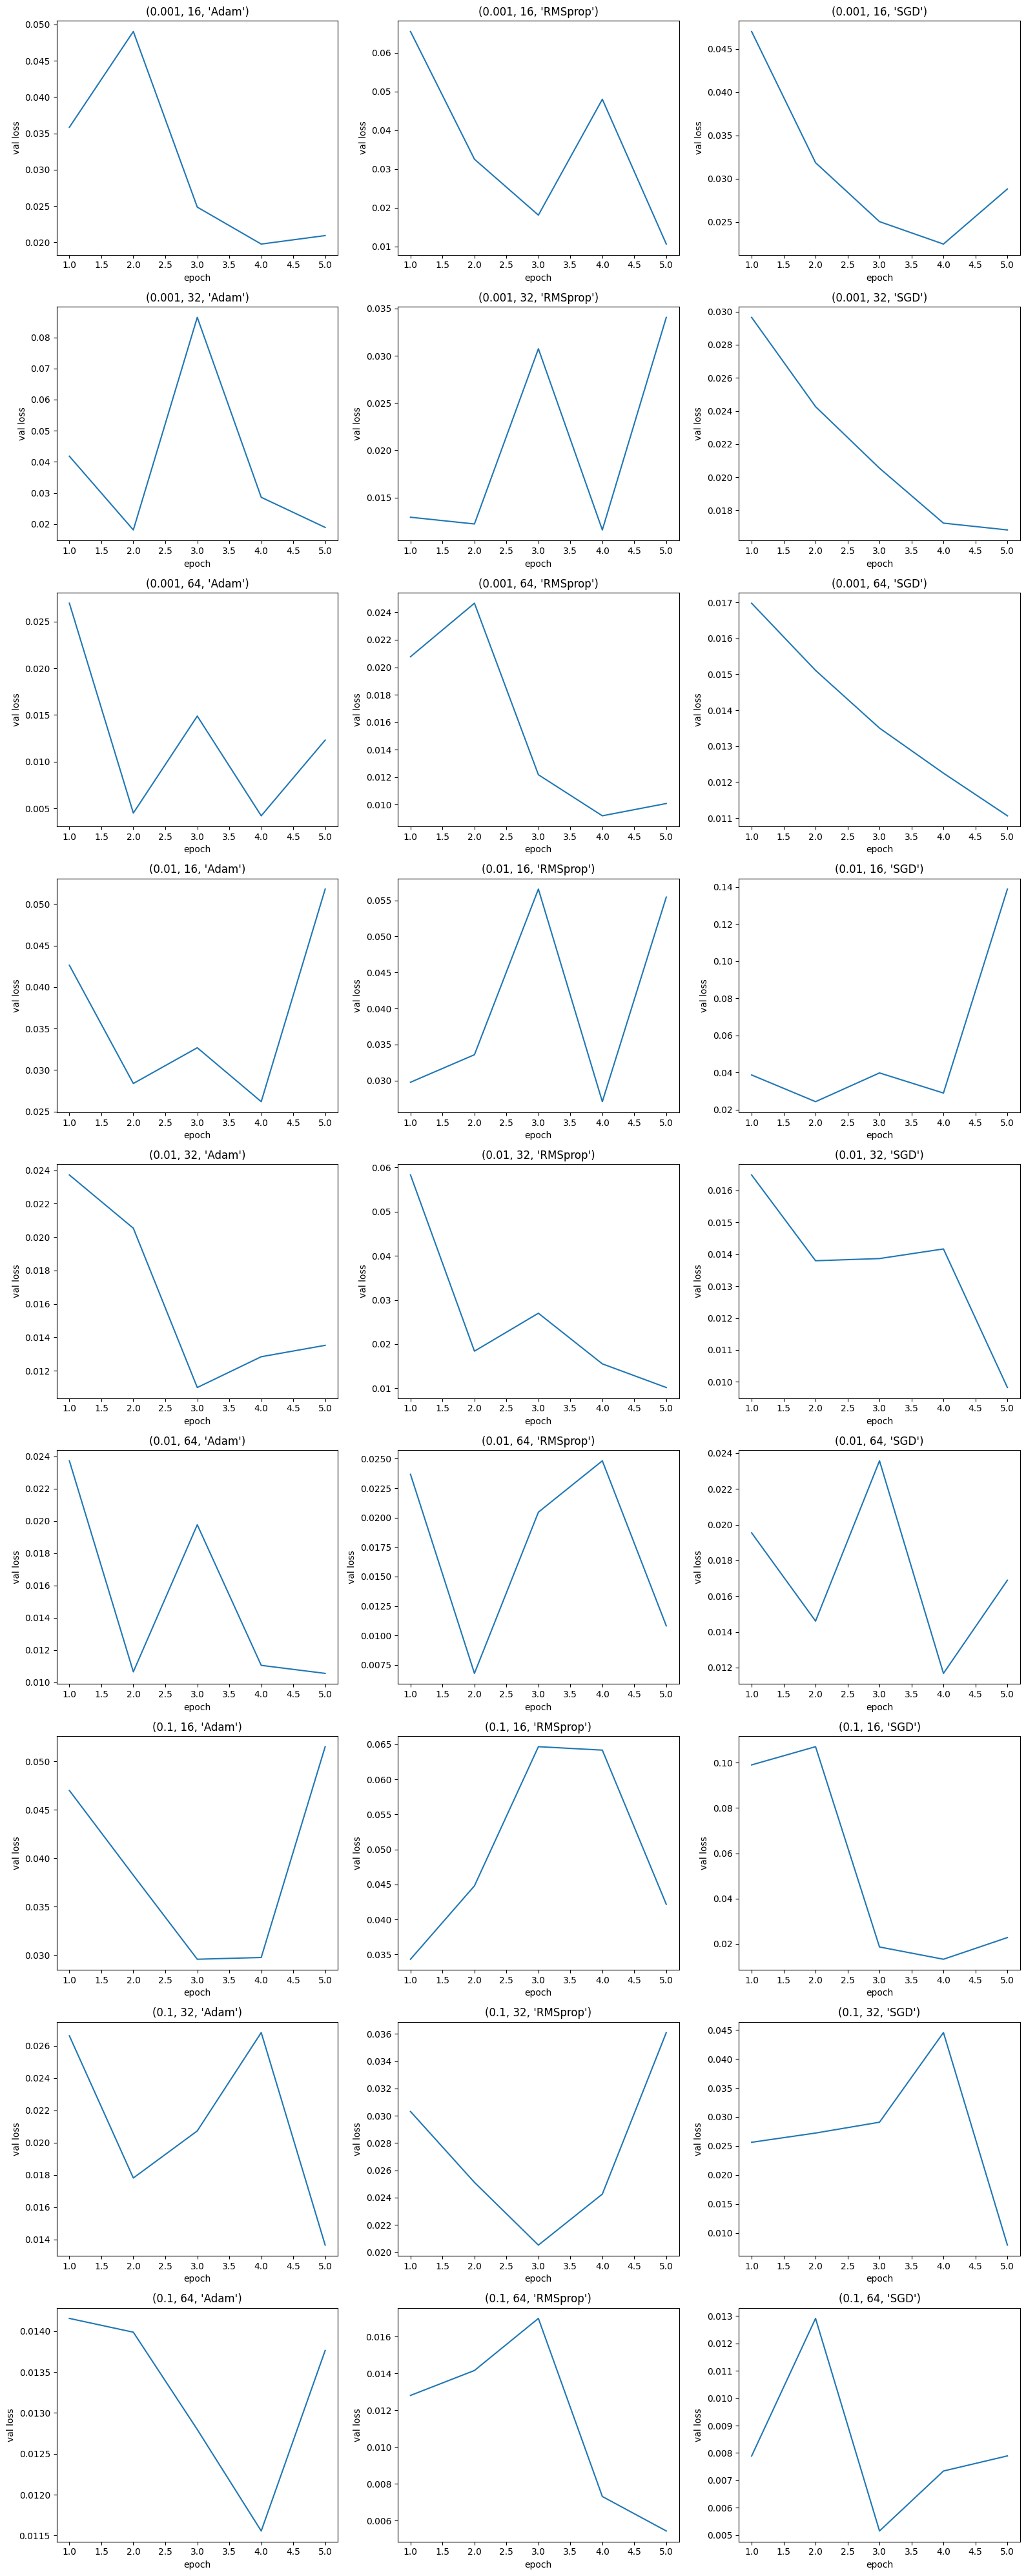

In [ ]:
plt.figure(figsize = (16,40))
cont = 1
for exp in df_val.groupby("hyperparameters"):
  plt.subplot(9,3,cont)
  plt.plot(exp[1]["epoch"],exp[1]["val_loss"])
  plt.title(exp[0])
  plt.xlabel("epoch")
  plt.ylabel("val loss")
  cont = cont + 1
plt.tight_layout()

-----

In [ ]:
num_epoch = 15
device = 'cuda:0' # use 'cuda:0' to speed it up.
train_loss_data_exp_2 = []
val_loss_data_exp_2 = []

In [ ]:
list_second_exps = [(0.1,16, "Adam"), (0.001,32, "Adam"),
                    (0.01,32, "SGD"), (0.001,64, "SGD")]

In [ ]:
for lr, batch_size, opt in list_second_exps:
    print(f"Training model with combination: (lr={lr}, batch_size={batch_size}, optimizer={opt})")

    model_resnet18_training = copy.deepcopy(model_resnet18)
    model_resnet18_training.to(device)
    if opt == "SGD":
        optimizer = torch.optim.SGD(model_resnet18_training.parameters(), lr=lr)
    elif opt == "RMSprop":
        optimizer = torch.optim.RMSprop(model_resnet18_training.parameters(), lr=lr)
    elif opt == "Adam":
        optimizer = torch.optim.Adam(model_resnet18_training.parameters(), lr=lr)

    train_loader = DataLoader(train_set, shuffle=True, batch_size = batch_size, pin_memory = True) # create train loader
    validation_loader = DataLoader(validation_set, batch_size = batch_size, pin_memory = True) # create test loader

    # Define loss function and training criterion
    criterion = torch.nn.CrossEntropyLoss()

    # Training
    for epoch in range(num_epoch):
        model_resnet18_training.train()
        train_loss = 0.0
        correct_train = 0.0
        total_train = 0.0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            out_preds = model_resnet18_training(inputs)
            l = criterion(out_preds, labels)

            model_resnet18_training.zero_grad()
            l.backward()
            optimizer.step()

            train_loss += l.item()
            _, predicted_train = torch.max(out_preds.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted_train == labels).sum().item()
        train_loss /= len(train_loader)
        train_accuracy = 100 * correct_train / total_train
        train_loss_data_exp_2.append([epoch+1,(lr, batch_size, opt), train_loss, train_accuracy])
        # Validation
        model_resnet18_training.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for inputs, labels in validation_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model_resnet18_training(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted_val = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted_val == labels).sum().item()

        # Calculate validation metrics
        val_loss /= len(validation_set)
        val_accuracy = 100 * correct_val / total_val
        val_loss_data_exp_2.append([epoch+1, (lr, batch_size, opt), val_loss, val_accuracy])
        # Print training and validation metrics for this epoch
        print(f"Epoch [{epoch+1}], Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

Training model with combination: (lr=0.1, batch_size=16, optimizer=Adam)
Epoch [1], Training Loss: 1.5320, Training Accuracy: 57.92%, Validation Loss: 0.0398, Validation Accuracy: 66.31%
Epoch [2], Training Loss: 0.6085, Training Accuracy: 74.35%, Validation Loss: 0.0296, Validation Accuracy: 82.38%
Epoch [3], Training Loss: 0.5357, Training Accuracy: 78.33%, Validation Loss: 0.0403, Validation Accuracy: 76.43%
Epoch [4], Training Loss: 0.4748, Training Accuracy: 80.92%, Validation Loss: 0.0254, Validation Accuracy: 85.48%
Epoch [5], Training Loss: 0.4364, Training Accuracy: 82.95%, Validation Loss: 0.0664, Validation Accuracy: 72.02%
Epoch [6], Training Loss: 0.4174, Training Accuracy: 83.81%, Validation Loss: 0.0258, Validation Accuracy: 83.93%
Epoch [7], Training Loss: 0.4087, Training Accuracy: 84.49%, Validation Loss: 0.0177, Validation Accuracy: 89.05%
Epoch [8], Training Loss: 0.3993, Training Accuracy: 85.24%, Validation Loss: 0.0176, Validation Accuracy: 90.00%
Epoch [9], Trai

In [ ]:
df_train_exps2 = pd.DataFrame(train_loss_data_exp_2, columns = ["epoch", "hyperparameters", "train_loss", "train_accuracy"])
df_val_exps2 = pd.DataFrame(val_loss_data_exp_2, columns = ["epoch", "hyperparameters", "val_loss", "val_accuracy"])

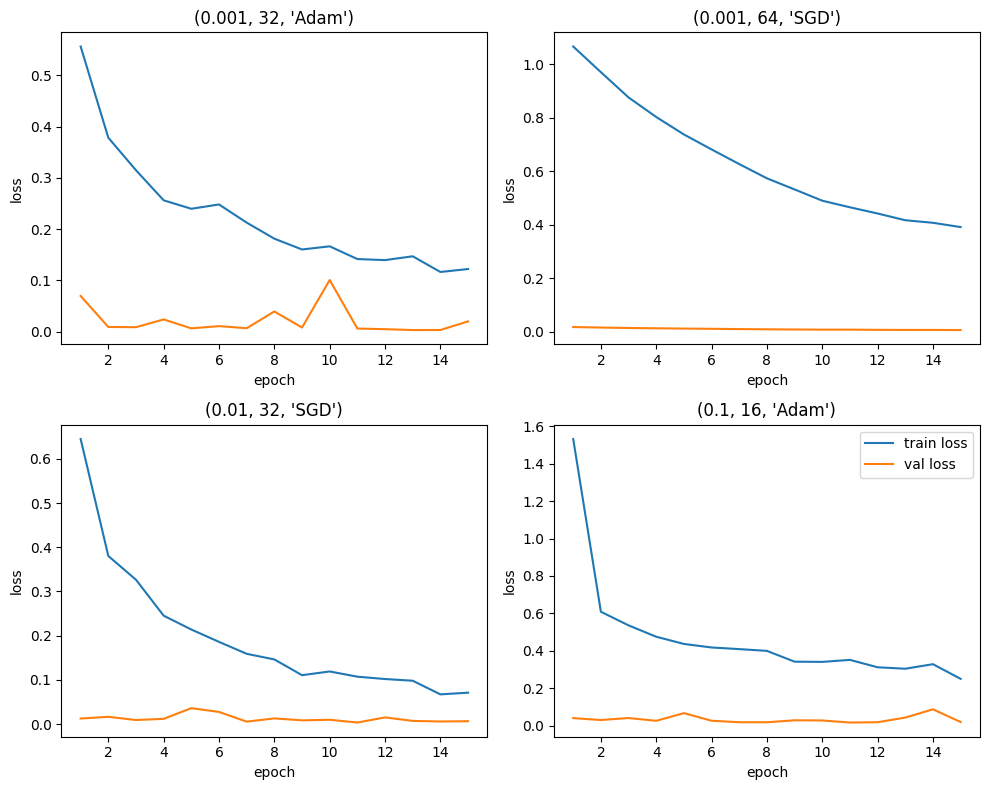

In [ ]:
plt.figure(figsize = (10,8))
cont = 1
for exp in df_train_exps2.groupby("hyperparameters"):
  validation_data = df_val_exps2[df_val_exps2["hyperparameters"] == exp[0]]
  plt.subplot(2,2,cont)
  plt.plot(exp[1]["epoch"],exp[1]["train_loss"], label = "train loss")
  plt.plot(validation_data["epoch"],validation_data["val_loss"], label = "val loss")
  plt.title(exp[0])
  plt.xlabel("epoch")
  plt.ylabel("loss")
  cont = cont + 1
plt.tight_layout()
plt.legend()

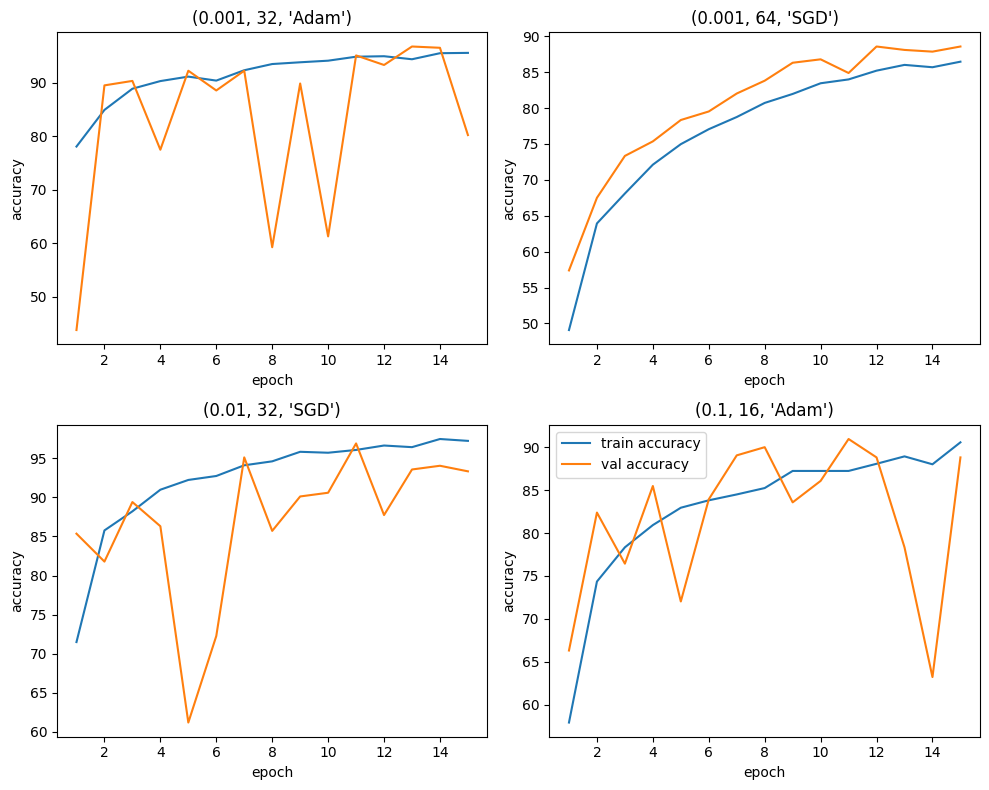

In [ ]:
plt.figure(figsize = (10,8))
cont = 1
for exp in df_train_exps2.groupby("hyperparameters"):
  validation_data = df_val_exps2[df_val_exps2["hyperparameters"] == exp[0]]
  plt.subplot(2,2,cont)
  plt.plot(exp[1]["epoch"],exp[1]["train_accuracy"], label = "train accuracy")
  plt.plot(validation_data["epoch"],validation_data["val_accuracy"], label = "val accuracy")
  plt.title(exp[0])
  plt.xlabel("epoch")
  plt.ylabel("accuracy")
  cont = cont + 1
plt.tight_layout()
plt.legend()